<a href="https://colab.research.google.com/github/Canihelpme/DeepLearning_finance/blob/main/Finance_discrete_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 26.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import os
from pathlib import Path

folder = ""
project_dir = ""

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive


In [4]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 35 kB/s 
     |████████████████████████████████| 3.8 MB 51.4 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 449 kB 49.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b3b131c3b808095f9c21334f8c54942c799033456666908d0799ccbe90d83dc8
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from IPython.display import clear_output

import pandas as pd
import os
import time
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

tensorflow version: 2.0.0
GPU 사용 가능 여부: False


In [19]:
filename = '/content/drive/MyDrive/Financial_data/Kospi_sample_20yr.csv'
df_original = pd.read_csv(filename, sep=",",encoding='UTF-8')
df_original['Date'] = df_original.Date.apply(str).str.replace("년 ","-").str.replace("월 ","-").str.replace("일","")
df_original.index = df_original.Date
#df_original = df_original.sort_values(by='Date', ascending=True)
df_original.head()

,Date,End,Open,Highest,Lowest,Amount,Variation%
Date,,,,,,,
2020-02-21,2020-02-21,"2,162.84","2,165.65","2,184.43","2,160.28",635.47M,-1.49%
2020-02-20,2020-02-20,"2,195.50","2,223.55","2,228.18","2,186.72",709.56M,-0.67%
2020-02-19,2020-02-19,"2,210.34","2,222.51","2,226.00","2,191.20",591.16M,0.07%
2020-02-18,2020-02-18,"2,208.88","2,225.98","2,232.93","2,205.21",470.42M,-1.48%
2020-02-17,2020-02-17,"2,242.17","2,243.07","2,250.05","2,230.26",458.25M,-0.06%


In [20]:
df = df_original[:400]
df = df[['End']]
df = df.sort_values(by='Date', ascending=True)
df.head()

,End
Date,
2018-07-06,"2,272.87"
2018-07-09,"2,285.80"
2018-07-10,"2,294.16"
2018-07-11,"2,280.62"
2018-07-12,"2,285.06"


Text(0.5, 1.0, 'Kospi')

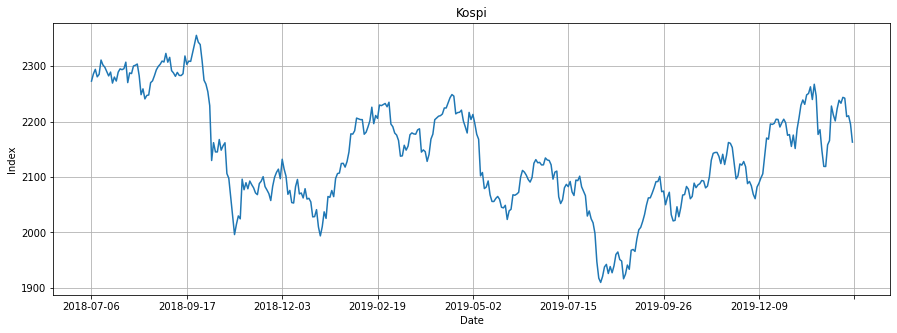

In [21]:
plt.figure(figsize=(15,5))

df['End'] = df.End.apply(str).str.replace(",","").astype(float)
df['End'].plot(grid=True)
plt.ylabel('Index')
plt.title('Kospi')

#**FFT**
 > 이산 푸리에 변환 Data denosing

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


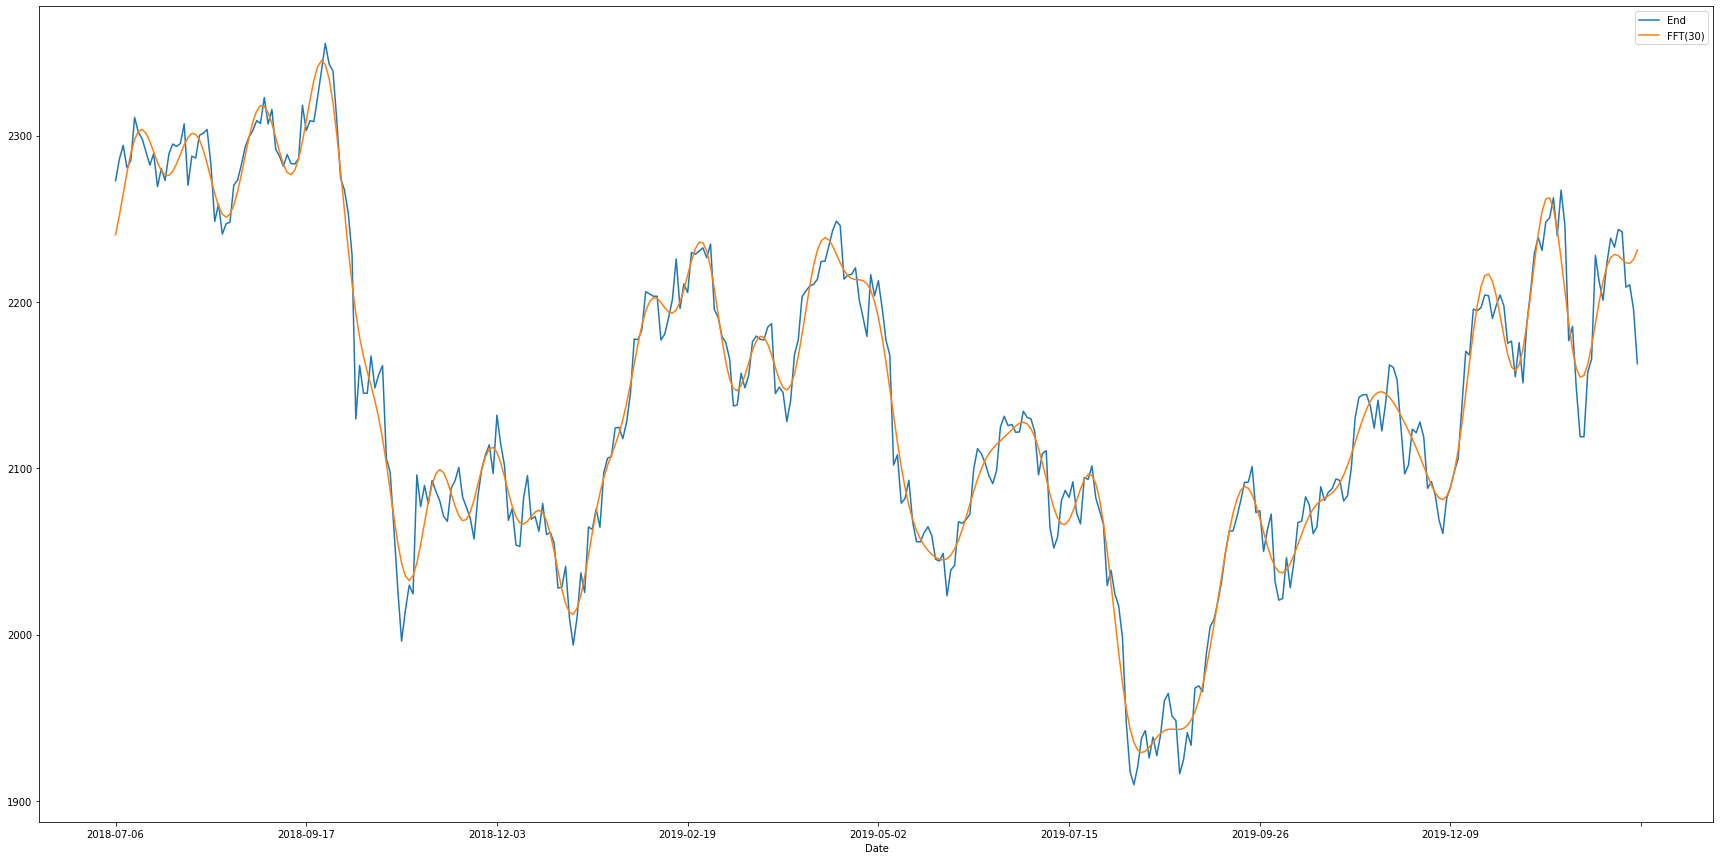

In [22]:
fft_df = df
def FFT(df, col, topn=2):
  fft = np.fft.fft(df[col]) 
  fft[topn:-topn] = 0 
  ifft = np.fft.ifft(fft) 
  return ifft 

fft_df['FFT(30)'] = FFT(fft_df, 'End', 30)

fig = plt.subplots(figsize=(30,15))
ax = plt.gca()
fft_df.plot(y='End',ax=ax)
fft_df.plot(y='FFT(30)', ax=ax)
plt.show()

#**FFT2**

Date
2018-07-06     0.00
2018-07-09    12.93
2018-07-10     8.36
2018-07-11   -13.54
2018-07-12     4.44
Name: delta, dtype: float64


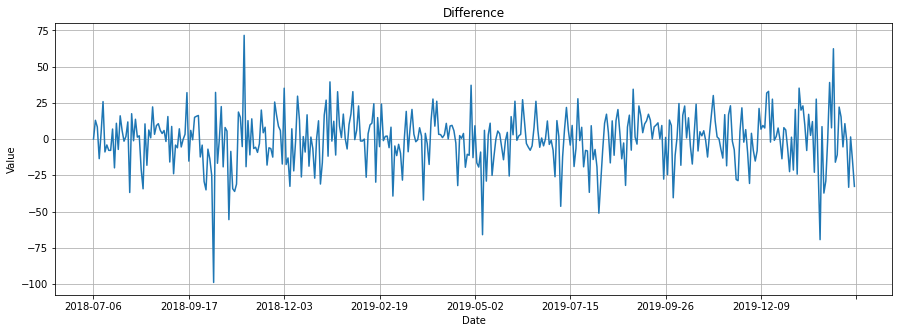

In [23]:
#Add 0 at the beginning to match size
fft2_df = df
plt.figure(figsize=(15,5))
fft2_df['delta'] = np.append(np.array([0]), np.diff(fft2_df['End'].values))
fft2_df['delta'].plot(grid=True)
plt.ylabel('Value')
plt.title('Difference')
print(df['delta'].head())

In [24]:
sp = np.fft.fft(fft2_df['delta'].values)
sp[:10]

array([-110.03        +0.j        ,   49.01095829+182.16141148j,
       -153.13326658+506.85591062j,  248.55797068-113.27225179j,
         45.81302731-299.7827327j , -175.81131079+105.99524102j,
       -472.62965158-161.0503465j ,   74.9745623 -198.203j     ,
       -323.98192547+697.92874718j,  639.64270427-289.60021042j])

In [25]:
fft2_df['theta'] = np.arctan(sp.imag/sp.real)
numValues = len(df)
numValuesHalf = numValues / 2
fft2_df['amplitude'] = np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
fft2_df['freq'] = np.fft.fftfreq(sp.size, d=1)

#SMA(단순 이동 평균)

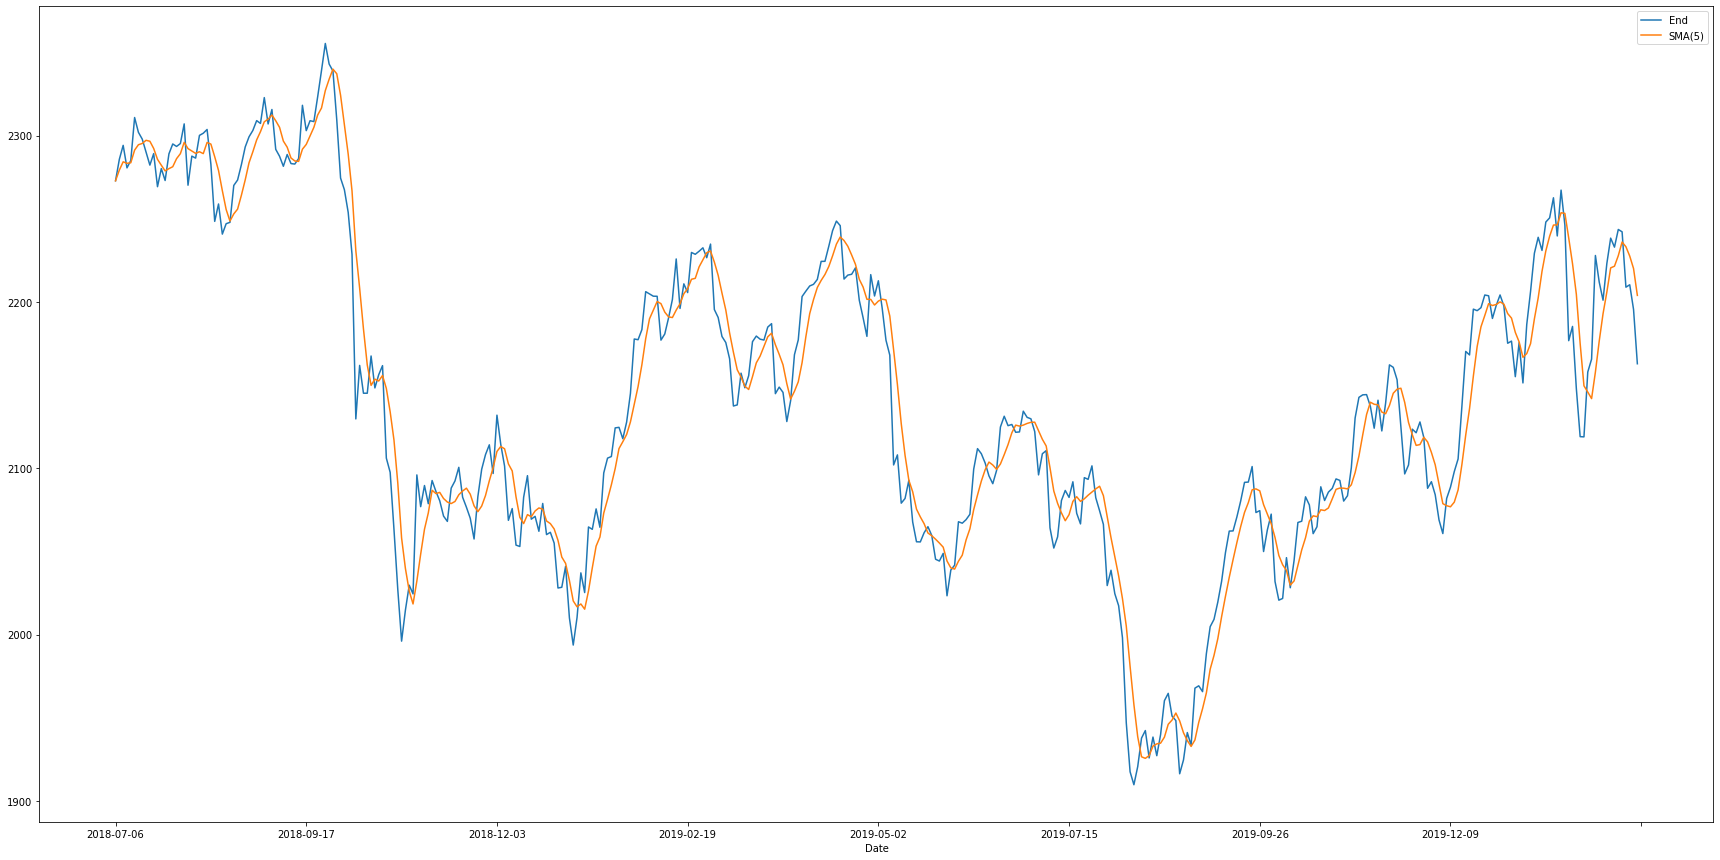

In [31]:
def SMA(df, col, window=2): 
  return df[col].rolling(window=window, min_periods=1).mean() 
  
df['SMA(5)'] = SMA(df, 'End', 5)
fig = plt.subplots(figsize=(30,15))
ax = plt.gca()
df.plot(y='End',ax=ax)
df.plot(y='SMA(5)', ax=ax)
plt.show()

#EMA (지수 이동 평균)

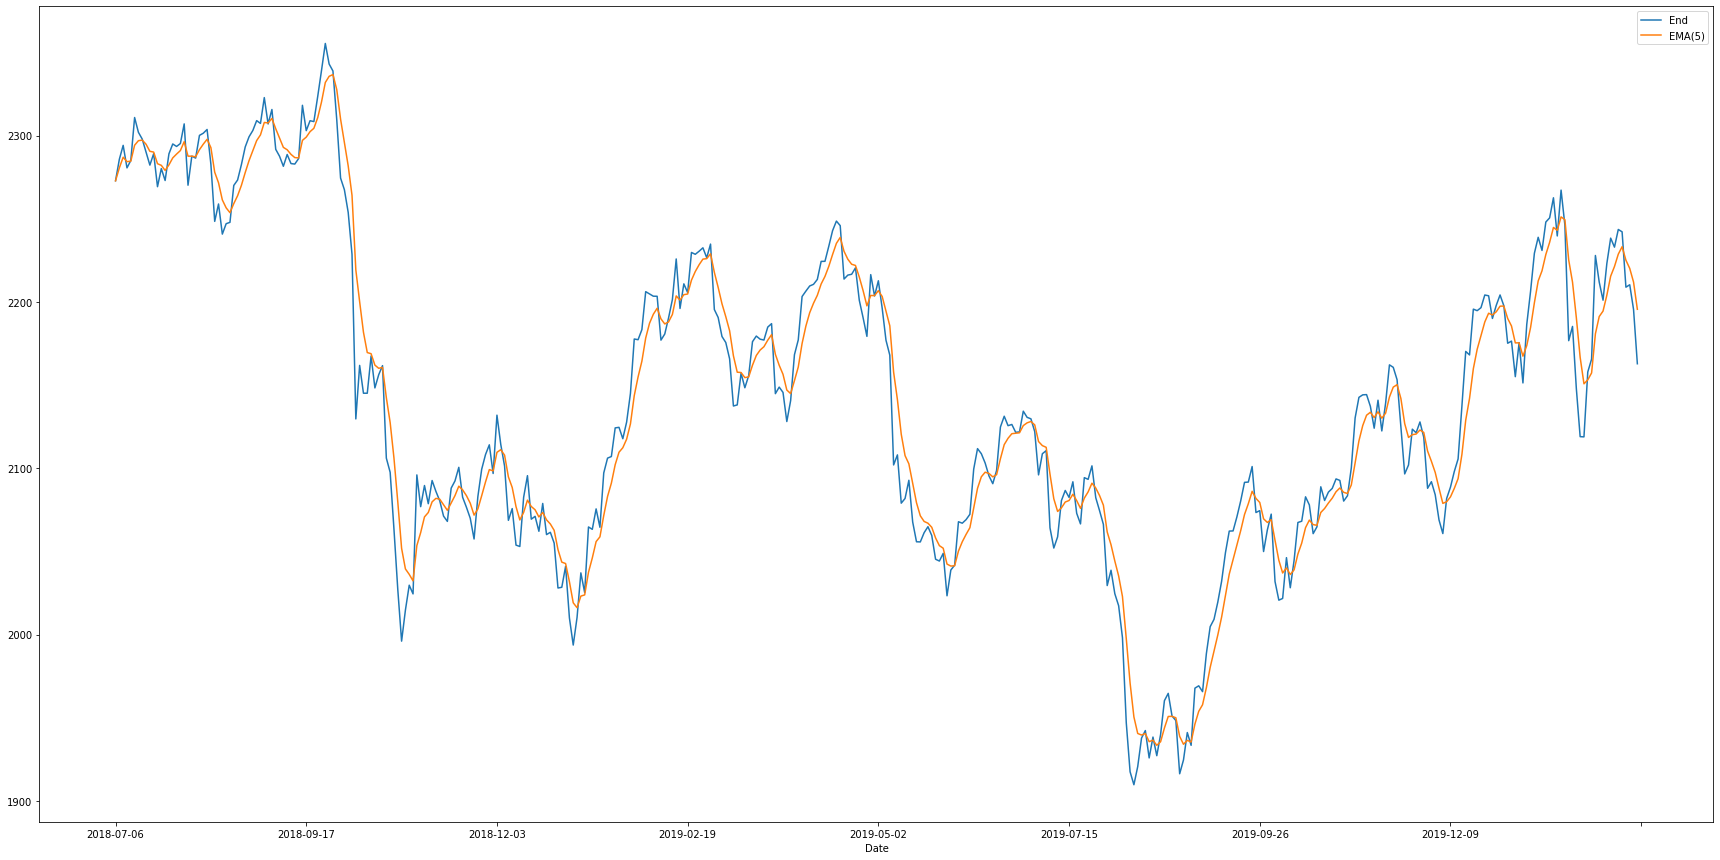

In [32]:
def EMA(df, col, span=2): 
  return df[col].ewm(span=span).mean() 

df['EMA(5)'] = EMA(df, 'End', 5)

fig = plt.subplots(figsize=(30,15))
ax = plt.gca()
df.plot(y='End',ax=ax)
df.plot(y='EMA(5)', ax=ax)
plt.show()

#Wavelet Transform

In [48]:
df['End'] = df.End.apply(str).str.replace(",","").astype(float)
print(df)

                End                FFT(30)  delta     theta  amplitude  \
Date                                                                     
2018-07-06  2272.87  2240.312414+1.864435j   0.00 -0.000000   0.550150   
2018-07-09  2285.80  2251.939909+2.313630j  12.93  1.307968   0.943197   
2018-07-10  2294.16  2264.960426+2.258485j   8.36 -1.277392   2.647417   
2018-07-11  2280.62  2277.895433+1.711019j -13.54 -0.427599   1.365757   
2018-07-12  2285.06  2289.252343+0.790573j   4.44 -1.419149   1.516316   
...             ...                    ...    ...       ...        ...   
2020-02-17  2242.17  2225.611590-2.334502j  -1.42  0.542543   1.026458   
2020-02-18  2208.88  2223.566148-1.942857j -33.29  1.419149   1.516316   
2020-02-19  2210.34  2223.162363-1.127695j   1.46  0.427599   1.365757   
2020-02-20  2195.50  2225.538091-0.066710j -14.84  1.277392   2.647417   
2020-02-21  2162.84  2231.277830+1.008817j -32.66 -1.307968   0.943197   

              freq        MA(5)      

In [60]:
import pywt

def WT(df, col, wavelet='db5', thresh=0.63): 
  signal = df[col].values
  thresh = thresh*np.nanmax(signal)
  coeff = pywt.wavedec(signal, wavelet, mode="per" )
  coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:]) 
  reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" ) 
  
  return reconstructed_signal

df['WT(5)'] = WT(df, 'End', 5)
fig = plt.subplots(figsize=(30,15))
ax = plt.gca()
df.plot(y='End',ax=ax)
df.plot(y='WT(5)', ax=ax)
plt.show()

AttributeError: ignored